# Human Interpretation of Machine Learning Models
**Project**: M3 Project 3b
**Author**: Jacob Buysse

In this project we are going to give human interpretation of different machine learning models for the edibility of mushrooms for both decision tree and logistic regression.

In this notebook we will be using...

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Part I

Let us load the mushrooms data set and view the head/info/describe results.

In [3]:
df = pd.read_csv('./csc5610-m4-mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The describe results were truncated since there were so many column.  Let us also look at those omitted columns.

In [6]:
df[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring']].describe()

,stalk-shape,stalk-root,stalk-surface-above-ring
count,8124,8124,8124
unique,2,5,4
top,t,b,s
freq,4608,3776,5176


So there appear to be 8124 rows with no missing values.  The `class` feature appears to be the output variable with values `e` for `edible` and `p` for `poisonous`.  There are 22 other columns to use as features, all of which appear to be single-letter categorical variables (ranging from 2 values to 12 values).

Let us now convert all features to categorical.

In [7]:
for column in df.columns:
    df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

For our analysis, let us look at the distinct categories for a few of our features.

In [8]:
useful_features = [
    'odor', 'stalk-root', 'stalk-surface-below-ring', 'stalk-surface-above-ring', 'spore-print-color',
    'stalk-color-below-ring', 'cap-color', 'cap-surface', 'cap-shape', 'ring-number', 'gill-size', 'population'
]
for feature in useful_features:
    print(f"{feature}: {df[feature].cat.categories.values}")

odor: ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
stalk-root: ['?' 'b' 'c' 'e' 'r']
stalk-surface-below-ring: ['f' 'k' 's' 'y']
stalk-surface-above-ring: ['f' 'k' 's' 'y']
spore-print-color: ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
stalk-color-below-ring: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
cap-color: ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
cap-surface: ['f' 'g' 's' 'y']
cap-shape: ['b' 'c' 'f' 'k' 's' 'x']
ring-number: ['n' 'o' 't']
gill-size: ['b' 'n']
population: ['a' 'c' 'n' 's' 'v' 'y']


## Part II - Label Encoding

Let us convert our output variable to a numeric using the `LabelEncoder` and inspect the first 10 rows.

In [9]:
top10 = df['class'][:10].values
print(f'First 10 classes: {top10}')
y_encoder = LabelEncoder()
y_encoder.fit(df['class'])
y = y_encoder.transform(df['class'])
print(f'First 10 encoded classes: {y[:10]}')

First 10 classes: ['p', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e']
Categories (2, object): ['e', 'p']
First 10 encoded classes: [1 0 0 1 0 0 0 0 1 0]


We can see that `edible` is being encoded as 0 and `poisonous` is being encoded as 1.

## Part III - Feature Encoding

Now we want to convert all of our input features from categorical values to numerical values using one-hot encoding.

In [10]:
X_source = df.loc[:, df.columns != 'class']
x_encoder = OneHotEncoder()
x_encoder.fit(X_source)
X = x_encoder.transform(X_source)
X

<8124x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178728 stored elements in Compressed Sparse Row format>

We have converted our original 22 categorical columns into 117 binary columns.  But as I read the instructions more clearly, I see that we were supposed to use the pandas `get_dummies` function to do this encoding.

In [11]:
bdf = pd.get_dummies(X_source, dtype=float)
bdf.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 7.3 MB


In [13]:
X = bdf.values
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

So this appears to be a second method of converting the source categorical columns into a 117 column binary matrix.

## Part IV - Experimental Setup

Now we want to divide our dataset into a training dataset (75%) and a testing dataset (25%).

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=df['class'])
print(f"X_train {len(X_train)}, X_test {len(X_test)}, y_train {len(y_train)}, y_test {len(y_test)}")

X_train 6093, X_test 2031, y_train 6093, y_test 2031


So we have 6,093 rows in our training dataset and 2,031 rows in our testing dataset.  This split should be consistent given the fixed random seed (`777`) and should be stratified over the resulting labels (`edible`/`poisonous`).

## Part V - Train, Visualize, and Interpret a Decision Tree

We will use the `DecisionTreeClassifier` class to train our model and predict the values for our testing dataset.

In [15]:
classifier = DecisionTreeClassifier(random_state=777)
classifier.fit(X_train, y_train);
y_pred = classifier.predict(X_test);
y_pred

array([0, 1, 0, ..., 0, 1, 1])

Now let us calculate our accuracy score.

In [16]:
accuracy_score(y_test, y_pred)

1.0

Hooray!  We got 100%.  It should be clear that the confusion matrix will have all zeros on the non-diagonal, but we will compute it anyway.

In [17]:
confusion_matrix(y_test, y_pred)

array([[1052,    0],
       [   0,  979]], dtype=int64)

So 1052 correctly identified as edible and 979 correctly identified as poisonous of the 2031 testing rows.  We will just double check those counts against the predicted values.

In [18]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([1052,  979], dtype=int64))

Now let us plot the decision tree to see how the classification is being done.

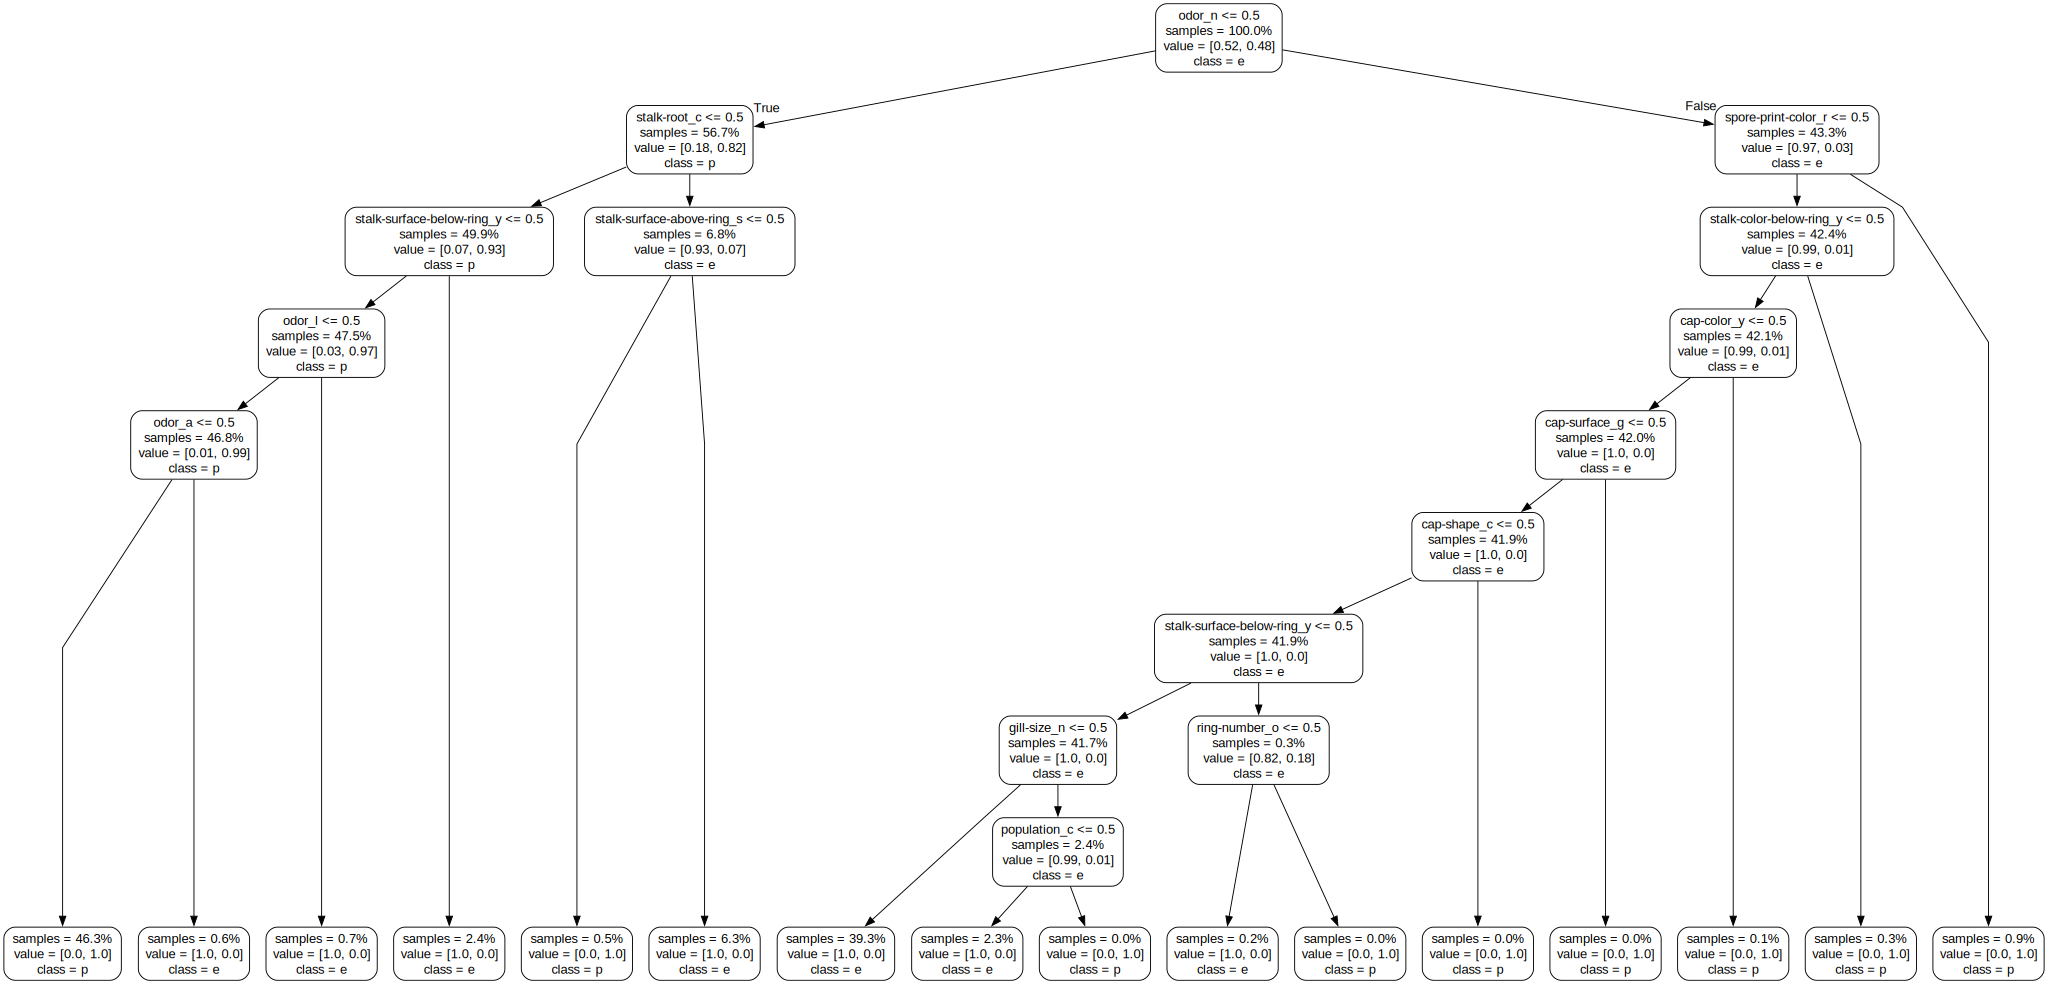

In [19]:
classifier_data = export_graphviz(
    classifier,
    feature_names=bdf.columns,
    proportion=True,
    precision=2,
    rounded=True,
    class_names=y_encoder.classes_,
    impurity=False,
    leaves_parallel=True)
classifier_graph = graphviz.Source(classifier_data)
classifier_graph

We can see this generates a fairly complex tree (9 decisions deep to get to final classifier in worst case).  Let us explore different `ccp_alpha` parameters between 0.001 and 0.1 and see the effect on the accuracy the decision tree complexity.

Let us start by defining a helper function that does the full process given a `ccp_alpha` value so we can quickly and succinctly test different values.

In [20]:
def test_ccp_alpha(ccp_alpha):
    test_classifier = DecisionTreeClassifier(random_state=777, ccp_alpha=ccp_alpha)
    test_classifier.fit(X_train, y_train)
    test_y_pred = test_classifier.predict(X_test)
    print(f"Testing ccp_alpha = {ccp_alpha}")
    print(f"Accuracy: {accuracy_score(y_test, test_y_pred)}")
    print(f"Confusion Matrix: {confusion_matrix(y_test, test_y_pred)}")
    test_classifier_data = export_graphviz(
        test_classifier,
        feature_names=bdf.columns,
        proportion=True,
        precision=2,
        rounded=True,
        class_names=y_encoder.classes_,
        impurity=False,
        leaves_parallel=True)
    return graphviz.Source(test_classifier_data)

The default value for `ccp_alpha` was 0, so we will start with the lowest value in our target range of 0.001.

Testing ccp_alpha = 0.001
Accuracy: 0.9965534219596258
Confusion Matrix: [[1052    0]
 [   7  972]]


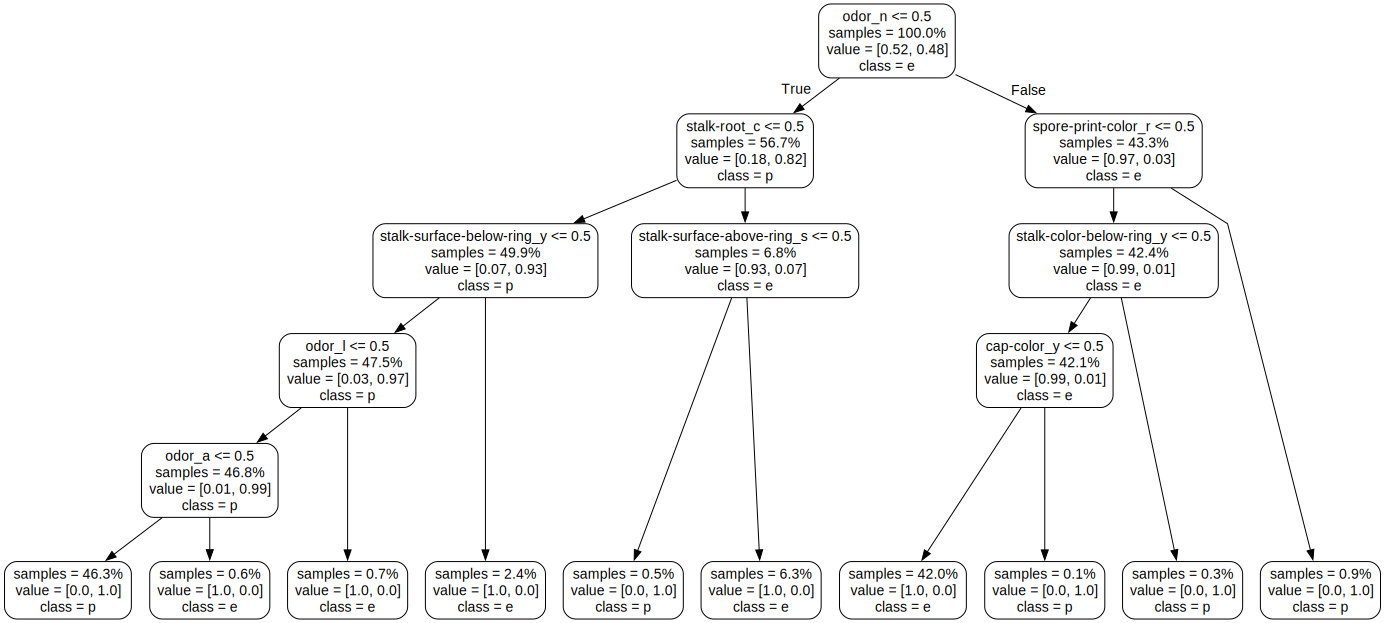

In [21]:
test_ccp_alpha(0.001)

This dropped our accuracy to 99.7%, misclassified 7 poisonous mushrooms as edible (uh-oh), and dropped the depth of the decision tree to 5 decisions for the longest branch.

Let us try one order of magnitude larger: 0.01.

Testing ccp_alpha = 0.01
Accuracy: 0.9896602658788775
Confusion Matrix: [[1052    0]
 [  21  958]]


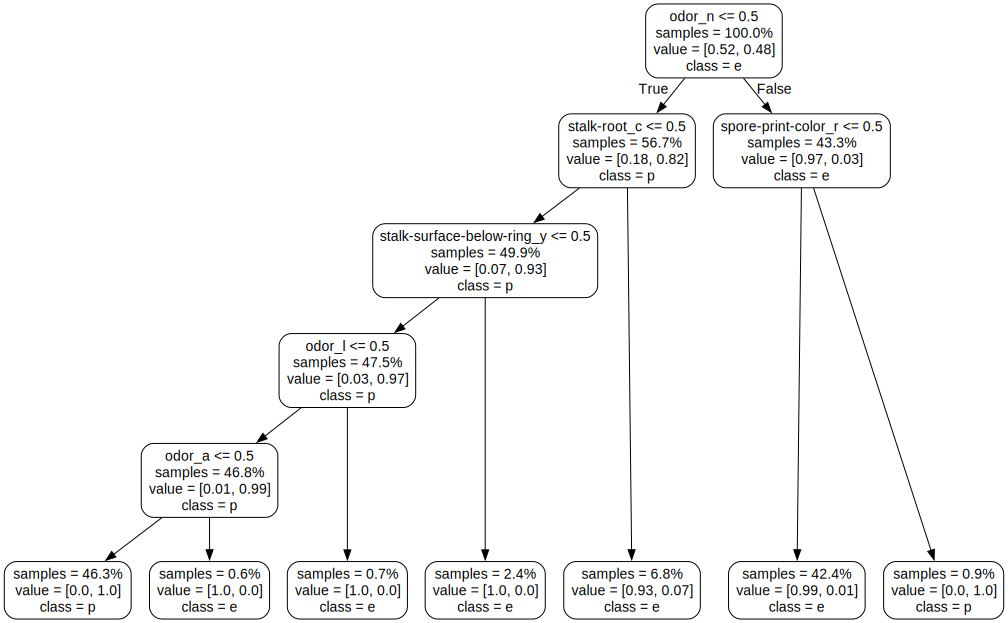

In [22]:
test_ccp_alpha(0.01)

This dropped accuracy to 99.0%, misclassified 21 poisonous mushrroms as ediable (I don't like this trend), but did not shrink the decision tree any further (still 5, worst case).

Next order of magnitude: 0.1.

Testing ccp_alpha = 0.1
Accuracy: 0.8892171344165436
Confusion Matrix: [[858 194]
 [ 31 948]]


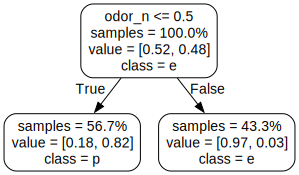

In [23]:
test_ccp_alpha(0.1)

That dropped our accuracy down to 88.9%, misclassified 194 edible as poisonous (oh well) and 31 poisonous as edible (not much worse than the previous), and droppped the decision tree down to a single decision: `odor_n { 0 -> poisonous, 1 -> edible }`.  Not the worst tradeoff (definitely not overfitting the model) and very easy to explain.

While not required, I want to know what happens when I turn the knob all the way to 1.

Testing ccp_alpha = 1
Accuracy: 0.517971442639094
Confusion Matrix: [[1052    0]
 [ 979    0]]


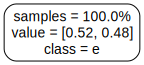

In [24]:
test_ccp_alpha(1)

So at the other end of the spectrum, we have an accuracy of 51.8%, misclassified all 979 poisonous mushrooms as edible (whoops), and made no decisions (other than deciding edible gave us a higher accuracy when always guessed).  This definitely feels like one of those situations where you would want to weight specific portions of the confusion matrix differently (always poisonous, while only 48.2% accurate, is a whole lot safer!).

## Part V - Train and Interpret a Logistic Regression Model

Now we will use an `SGDClassifier` to train a logistic regression model.

In [25]:
log_classifier = SGDClassifier(random_state=777, loss="log_loss")
log_classifier.fit(X_train, y_train)
log_y_pred = log_classifier.predict(X_test)
log_y_pred

array([0, 1, 0, ..., 0, 1, 1])

Now let us check the accuracy.

In [26]:
accuracy_score(y_test, log_y_pred)

1.0

We also get a 100% accuracy.  Now let us verify the confusion matrix.

In [27]:
confusion_matrix(y_test, log_y_pred)

array([[1052,    0],
       [   0,  979]], dtype=int64)

This also looks correct with non-zero values only on the diagonal.  Now let us analyze the estimated probabilities.

In [28]:
log_probs = log_classifier.predict_proba(X_test)[:, 0]
log_probs

array([9.98691414e-01, 6.53403344e-06, 9.98888711e-01, ...,
       9.99589242e-01, 1.78082113e-04, 8.80971282e-04])

Now let us plot a histogram of the probabilities.

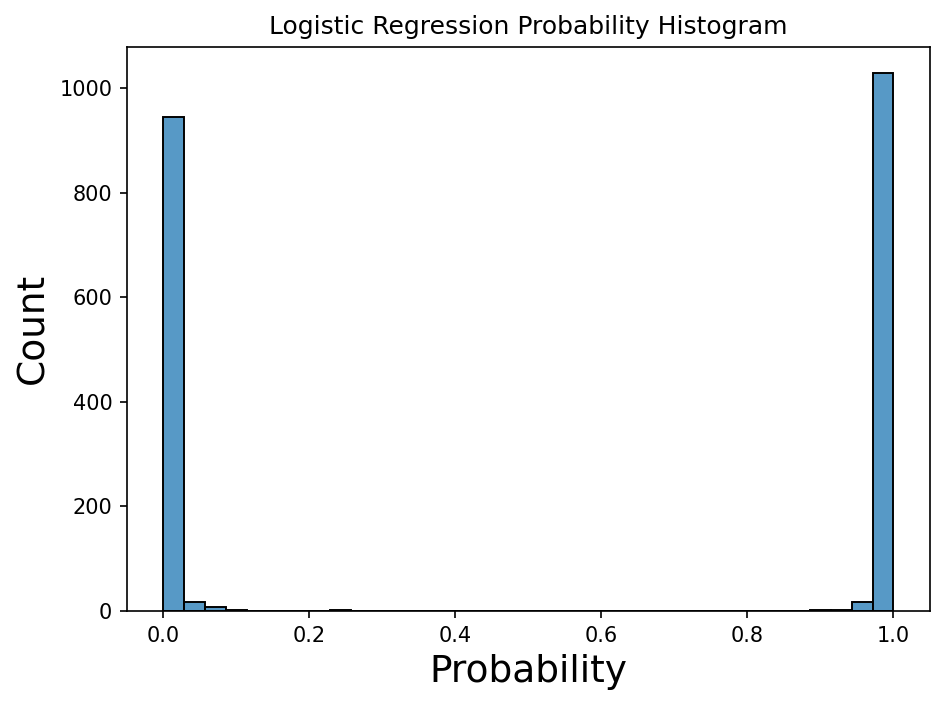

In [29]:
plot_probs = sns.histplot(log_probs, bins=35)
plot_probs.set(xlabel="Probability", ylabel="Count", title="Logistic Regression Probability Histogram");

This is extremely bimodal with most probabilities being either near-zero or near-one.  Now let us analyze the weights for each feature.

In [30]:
log_weights = log_classifier.coef_[0]
log_weights

array([ 0.26561448,  0.8217308 , -0.26269371, -0.03679424, -0.66983172,
       -0.44081891, -1.01091062,  0.74264224,  0.10245844, -0.15698336,
        0.94412102, -1.10371031, -0.02775997, -0.04118245, -0.5539827 ,
        0.94827524, -0.43043852, -0.28274355,  0.48689568, -0.26226773,
       -0.3501824 ,  0.0273891 , -3.18982695,  3.0122816 ,  2.86852199,
       -3.15342543,  0.30099845, -4.56868682,  2.42881713,  1.04784063,
        0.9306861 , -0.20863206, -0.11416124,  1.62125686, -1.94405015,
       -2.59895344,  2.27616015,  2.03099835, -0.65282533, -0.16773486,
        0.13540218, -0.6297084 , -0.78040169, -0.0796672 , -0.58575188,
        0.9340945 , -0.2596034 , -0.42800501,  0.16040945,  0.55317882,
       -0.87597211, -0.63721177,  2.50942523, -1.24377352, -0.06808182,
       -0.88315142, -0.8355642 ,  2.11508363, -1.57068849, -0.03162423,
       -1.49881266,  0.52644001, -0.55880741,  1.20838675,  0.16479304,
        0.30099845, -0.66654452, -0.4061712 , -0.38168773, -0.47

Now let us plot a histogram of the weights.

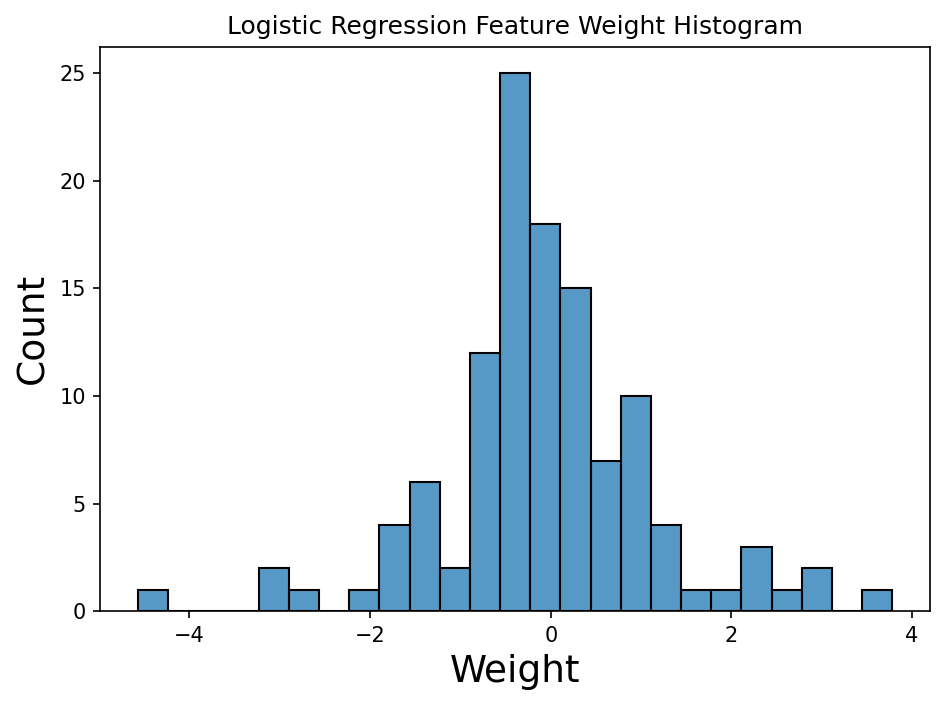

In [31]:
plot_weights = sns.histplot(log_weights, bins=25)
plot_weights.set(xlabel="Weight", ylabel="Count", title="Logistic Regression Feature Weight Histogram");

We can see that the majority of features have a weight close to zero.  The outliers to either side are the features that have the most predictive power.

For fun, lets look at which features had the highest predictive power (negative for edible, positive for poisonous).

In [32]:
edible_mask = pd.Series(log_weights) <= -2
pd.DataFrame({ 'feature': bdf.columns[edible_mask], 'weight': log_weights[edible_mask] })

,feature,weight
0,odor_a,-3.189827
1,odor_l,-3.153425
2,odor_n,-4.568687
3,gill-size_b,-2.598953


Odor categories a, l, and n along with gill-size b appear to be the best predictors for edible mushrooms.

In [33]:
poisonous_mask = pd.Series(log_weights) >= 2
pd.DataFrame({ 'feature': bdf.columns[poisonous_mask], 'weight': log_weights[poisonous_mask] })

,feature,weight
0,odor_c,3.012282
1,odor_f,2.868522
2,odor_p,2.428817
3,gill-size_n,2.276160
4,gill-color_b,2.030998
5,stalk-root_b,2.509425
6,stalk-surface-above-ring_k,2.115084
7,spore-print-color_r,3.781589


Odor categories c, f, and p along with gill-size n, gill-color b, stalk-root b, stalk-surface-above-ring k, and spore-print-color r are the best predictors for poisonous mushrooms.